# Heart Disease Prediction

In [1]:
#%cd C:\Users\MSI MODERN\Desktop\fdm project\Jupiter

In [2]:
# Data manipulation and analysis
import pandas as pd

# Scientific computing
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score, roc_curve, roc_auc_score

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
file_path = 'D:/python/PROJECT/Dataset_lr.csv'  # Replace 'path_to_your_dataset' with the actual path
heart_data = pd.read_csv(file_path)

In [4]:
heart_data.shape

(4238, 16)

In [5]:
filtered_data = heart_data[heart_data['TenYearCHD'] == 1]

# Count the number of occurrences where TenYearCHD is equal to 1
count = len(filtered_data)

# 'filtered_data' now contains rows where TenYearCHD is equal to 1
print("Filtered Data:")
print(filtered_data)

# Print the count
print("Number of occurrences where TenYearCHD is equal to 1:", count)

Filtered Data:
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
3        0   61        3.0              1        30.0     0.0   
6        0   63        1.0              0         0.0     0.0   
15       0   38        2.0              1        20.0     0.0   
17       0   46        2.0              1        20.0     0.0   
25       1   47        4.0              1        20.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4221     1   50        1.0              0         0.0     0.0   
4223     1   56        4.0              0         0.0     1.0   
4226     1   58        1.0              0         0.0     0.0   
4232     1   68        1.0              0         0.0     0.0   
4233     1   50        1.0              1         1.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3                   0             1         0    225.0  150.0   95.0  28.58   
6                   0             0         0 

In [6]:
heart_data.head(17)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [7]:
heart_data.drop('education', axis = 1, inplace = True)

In [8]:
null_values = heart_data.isnull().sum()

In [9]:
null_values

male                 0
age                  0
currentSmoker        0
cigsPerDay          26
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             47
sysBP                0
diaBP                0
BMI                 18
heartRate            1
glucose            366
TenYearCHD           0
dtype: int64

In [10]:
heart_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
heart_data = heart_data.rename(columns={"BPMeds": "bloodPressureMedication", "totChol": "cholesterol" })

In [12]:
data_types = heart_data.dtypes

In [13]:
data_types

male                         int64
age                          int64
currentSmoker                int64
cigsPerDay                 float64
bloodPressureMedication    float64
prevalentStroke              int64
prevalentHyp                 int64
diabetes                     int64
cholesterol                float64
sysBP                      float64
diaBP                      float64
BMI                        float64
heartRate                  float64
glucose                    float64
TenYearCHD                   int64
dtype: object

In [14]:
null_values = heart_data.isnull().sum()

In [15]:
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                  26
bloodPressureMedication     53
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol                 47
sysBP                        0
diaBP                        0
BMI                         18
heartRate                    1
glucose                    366
TenYearCHD                   0
dtype: int64

## Cleaning

In [16]:
#remove non values

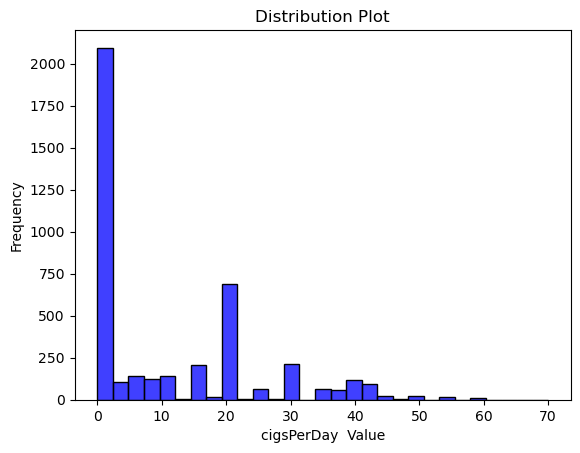

In [17]:
import seaborn as sns

# Sample data
data = heart_data.cigsPerDay 

# Create a distribution plot
sns.histplot(data, color='blue')

# Add labels and title
plt.xlabel('cigsPerDay  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [18]:
heart_data['cigsPerDay'].fillna(heart_data['cigsPerDay'].median() , inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
bloodPressureMedication     53
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol                 47
sysBP                        0
diaBP                        0
BMI                         18
heartRate                    1
glucose                    366
TenYearCHD                   0
dtype: int64

In [19]:
count_bpm_zero = (heart_data['bloodPressureMedication'] == 1).sum()

In [20]:
count_bpm_zero

383

In [21]:
heart_data['bloodPressureMedication'].fillna(heart_data['bloodPressureMedication'].median() , inplace=True)

In [22]:
count_bpm_zero = (heart_data['bloodPressureMedication'] == 0).sum()

In [23]:
count_bpm_zero

3855

In [24]:
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
bloodPressureMedication      0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol                 47
sysBP                        0
diaBP                        0
BMI                         18
heartRate                    1
glucose                    366
TenYearCHD                   0
dtype: int64

In [25]:
heart_data["cholesterol"].fillna(heart_data['cholesterol'].mean(),inplace=True)

In [26]:
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
bloodPressureMedication      0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol                  0
sysBP                        0
diaBP                        0
BMI                         18
heartRate                    1
glucose                    366
TenYearCHD                   0
dtype: int64

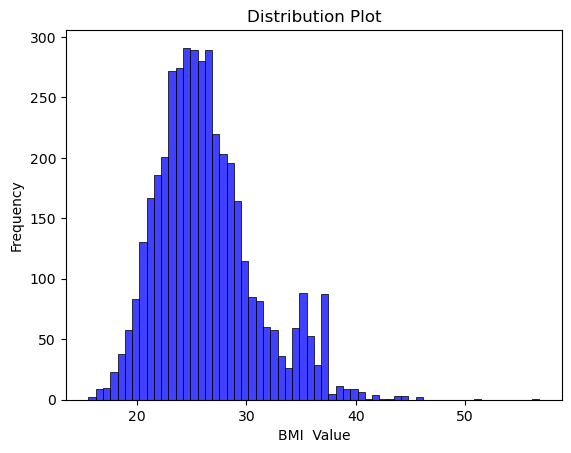

In [27]:
bmi = heart_data.BMI                  

# Create a distribution plot
sns.histplot(bmi, color='blue')

# Add labels and title
plt.xlabel('BMI  Value')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [28]:
heart_data["BMI"].fillna(heart_data['BMI'].mean(),inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
bloodPressureMedication      0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol                  0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    1
glucose                    366
TenYearCHD                   0
dtype: int64

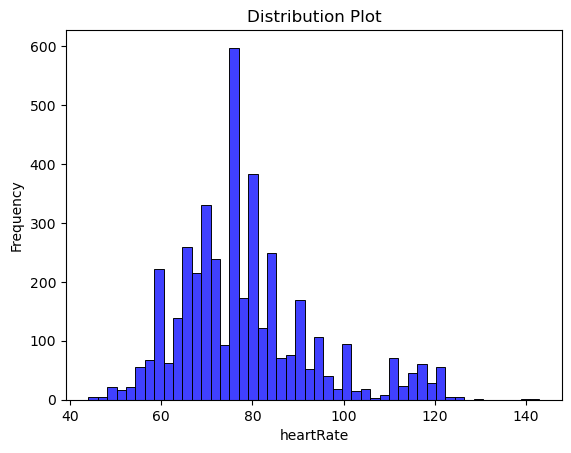

In [29]:
heartRate = heart_data.heartRate                              

# Create a distribution plot
sns.histplot(heartRate, color='blue')

# Add labels and title
plt.xlabel('heartRate')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [30]:
heart_data["heartRate"].fillna(heart_data['heartRate'].mean(),inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                         0
age                          0
currentSmoker                0
cigsPerDay                   0
bloodPressureMedication      0
prevalentStroke              0
prevalentHyp                 0
diabetes                     0
cholesterol                  0
sysBP                        0
diaBP                        0
BMI                          0
heartRate                    0
glucose                    366
TenYearCHD                   0
dtype: int64

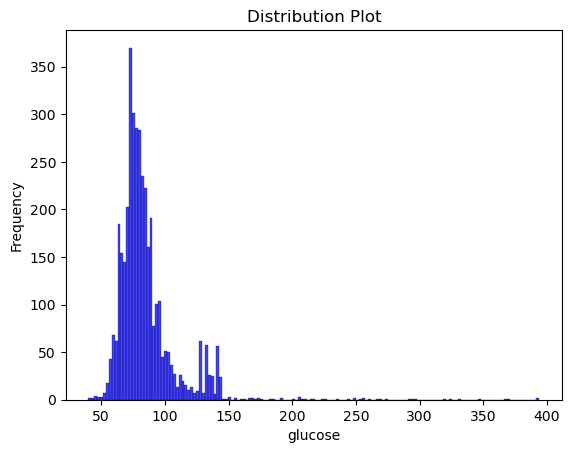

In [31]:
glucose= heart_data.glucose                                          

# Create a distribution plot
sns.histplot(glucose, color='blue')

# Add labels and title
plt.xlabel('glucose')
plt.ylabel('Frequency')
plt.title('Distribution Plot')

# Display the plot
plt.show()

In [32]:
heart_data["glucose"].fillna(heart_data['glucose'].mean(),inplace=True)
null_values = heart_data.isnull().sum()
null_values

male                       0
age                        0
currentSmoker              0
cigsPerDay                 0
bloodPressureMedication    0
prevalentStroke            0
prevalentHyp               0
diabetes                   0
cholesterol                0
sysBP                      0
diaBP                      0
BMI                        0
heartRate                  0
glucose                    0
TenYearCHD                 0
dtype: int64

In [33]:
heart_data.head(16)
heart_data.dtypes

male                         int64
age                          int64
currentSmoker                int64
cigsPerDay                 float64
bloodPressureMedication    float64
prevalentStroke              int64
prevalentHyp                 int64
diabetes                     int64
cholesterol                float64
sysBP                      float64
diaBP                      float64
BMI                        float64
heartRate                  float64
glucose                    float64
TenYearCHD                   int64
dtype: object

In [34]:
heart_data

,male,age,currentSmoker,cigsPerDay,bloodPressureMedication,prevalentStroke,prevalentHyp,diabetes,cholesterol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,85.572572,0


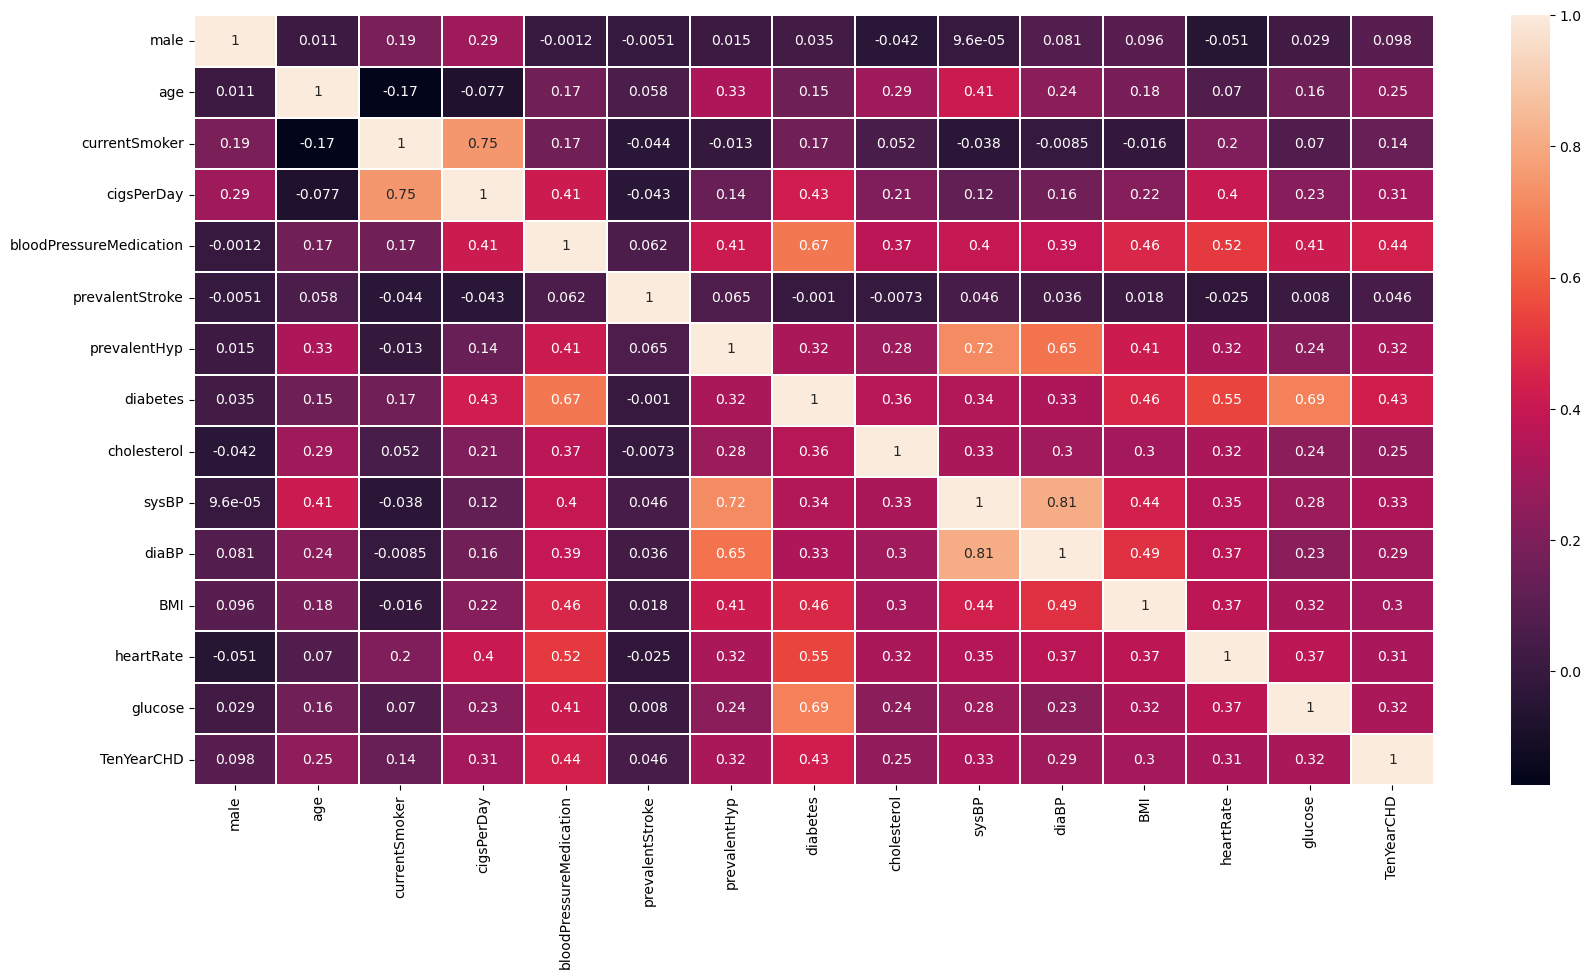

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(heart_data.corr(),linewidths=0.1,annot=True)
# linewidths is white space between boxes and annot gives value
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5984\36296098.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  heart_data.hist(ax = ax)


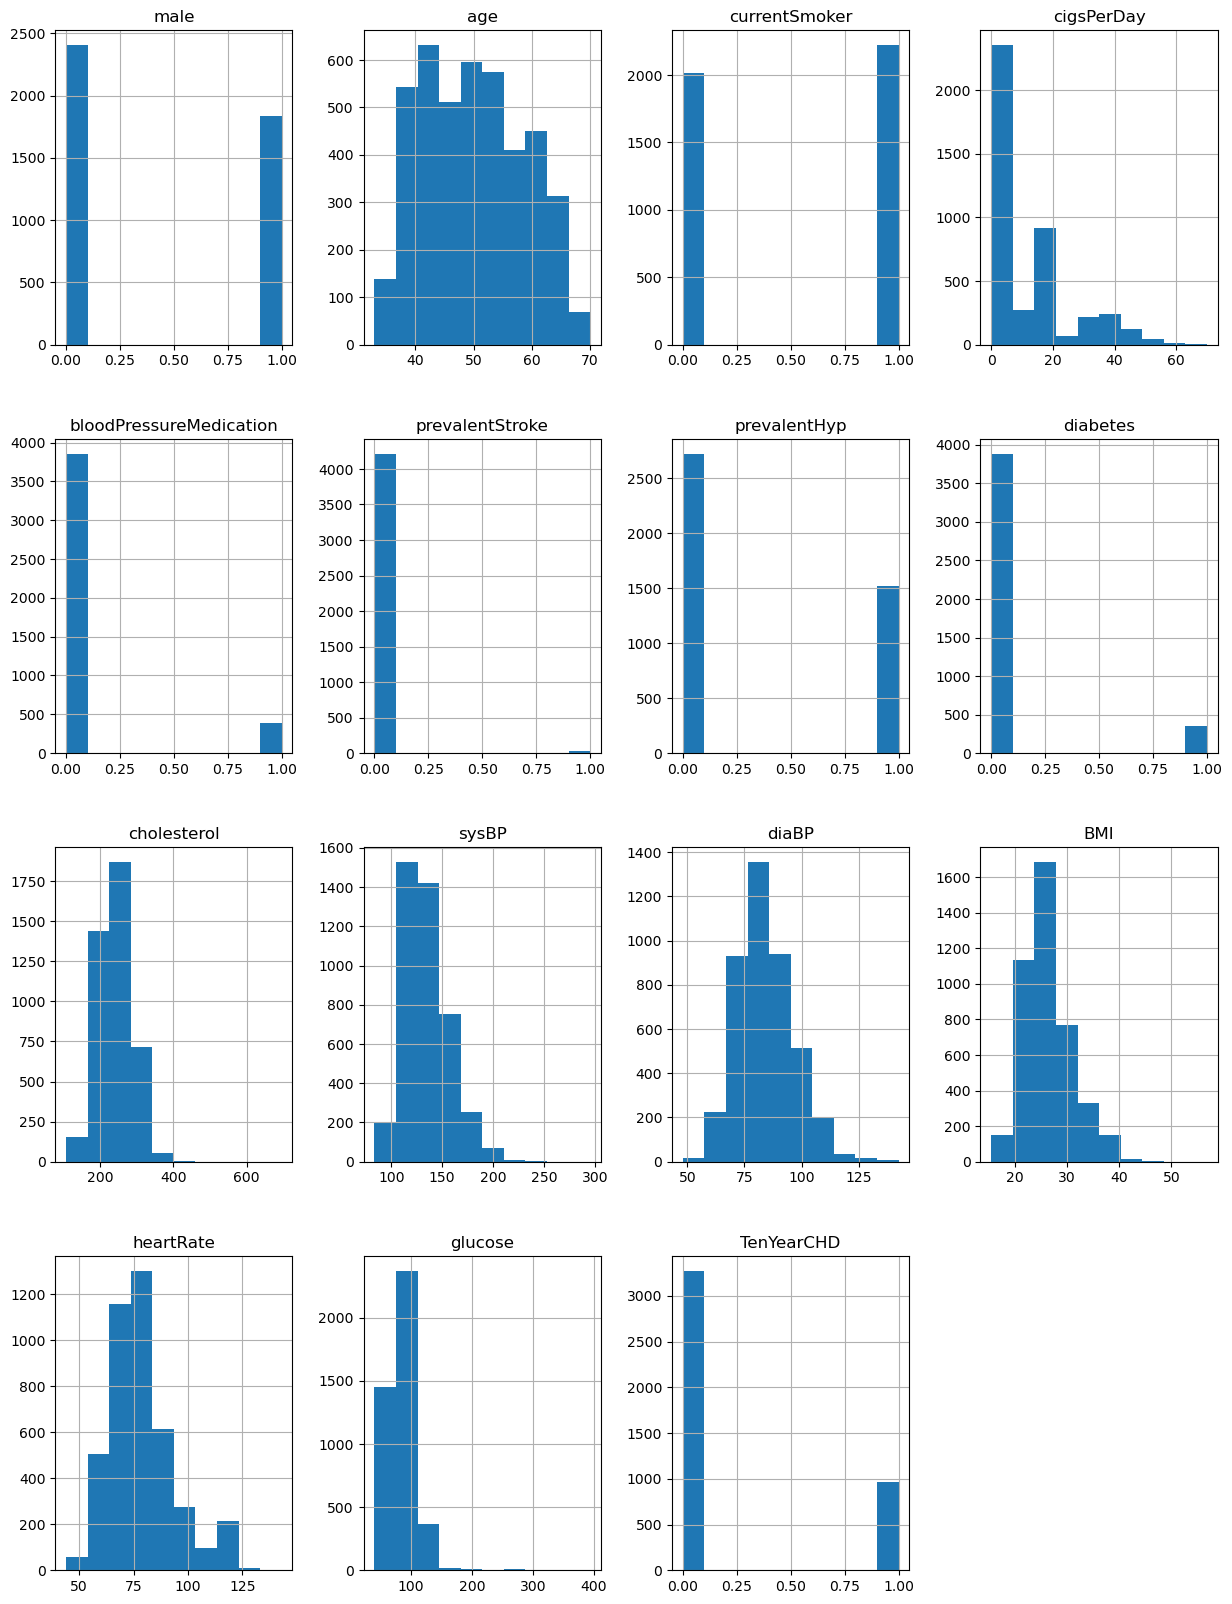

In [36]:
#distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)
plt.show()

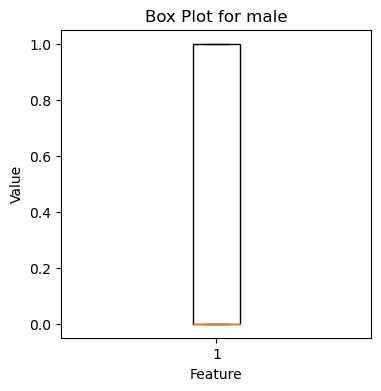

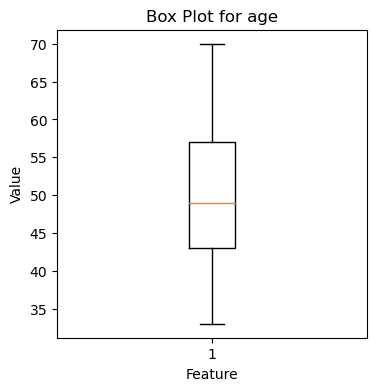

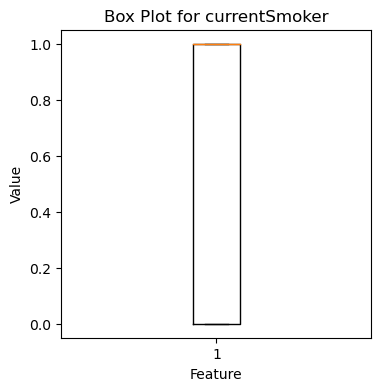

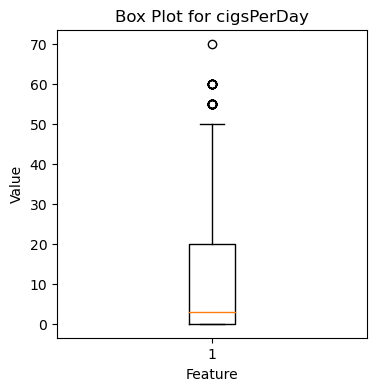

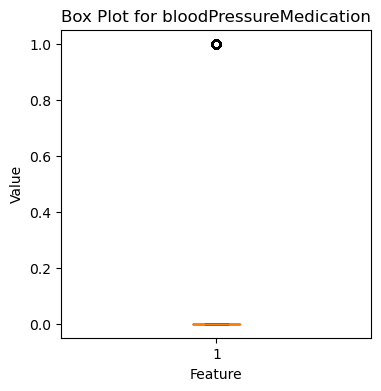

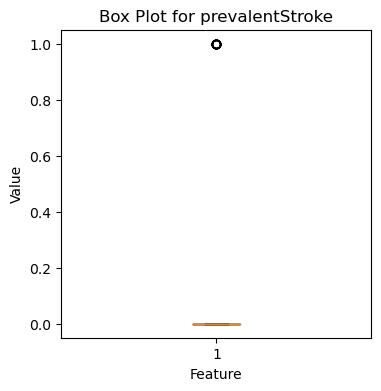

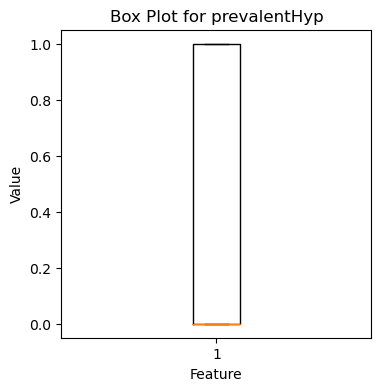

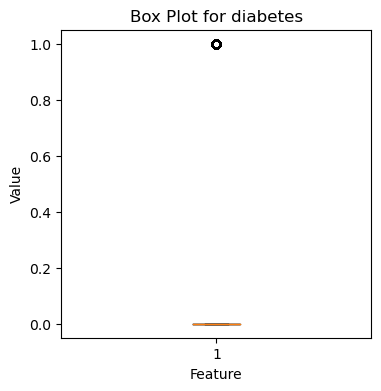

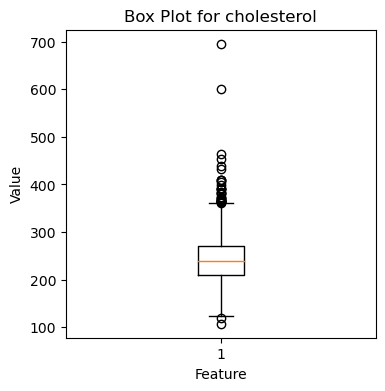

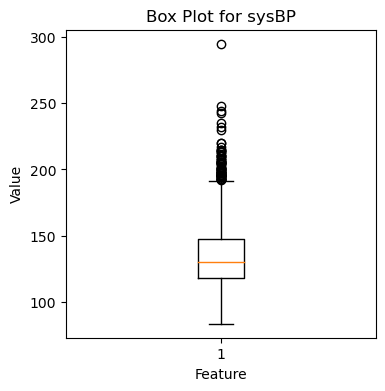

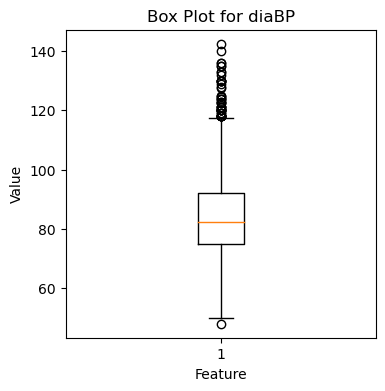

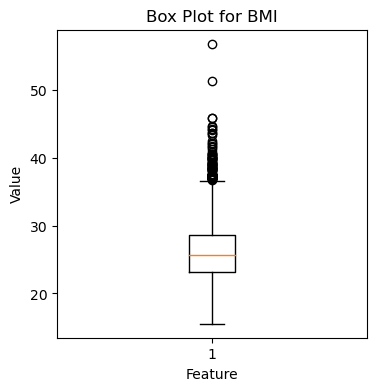

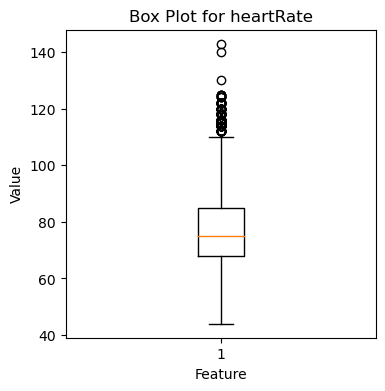

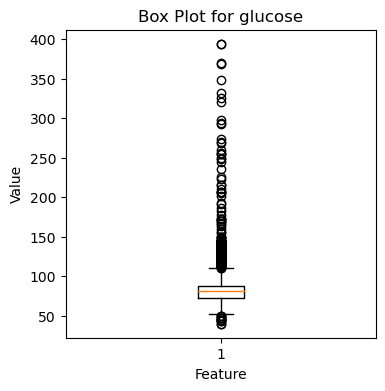

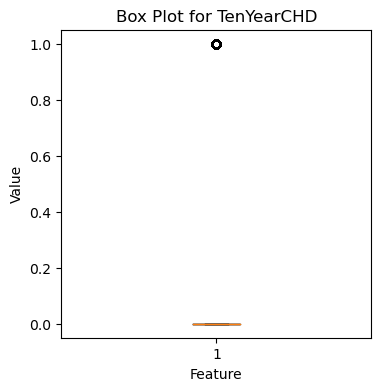

In [37]:

features = heart_data.columns

# Create individual box plots for each feature
for feature in features:
   
    plt.figure(figsize=(4, 4))
    
   
    plt.boxplot(heart_data[feature])
    
   
    plt.title(f'Box Plot for {feature}')
    plt.xlabel('Feature')
    plt.ylabel('Value')
    
   
    plt.show()

,male,age,currentSmoker,cigsPerDay,bloodPressureMedication,prevalentStroke,prevalentHyp,diabetes,cholesterol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1111,0,52,0,0.0,0.0,0,1,1,600.0,159.5,94.0,28.27,78.0,140.0,1
3160,1,51,1,9.0,0.0,0,1,0,696.0,157.0,87.0,24.44,95.0,84.0,0


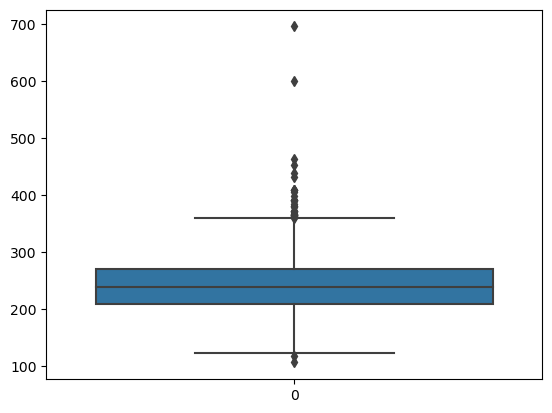

In [38]:
sns.boxplot(heart_data.cholesterol)
outliers = heart_data[(heart_data['cholesterol'] > 500)] 
outliers

<Axes: >

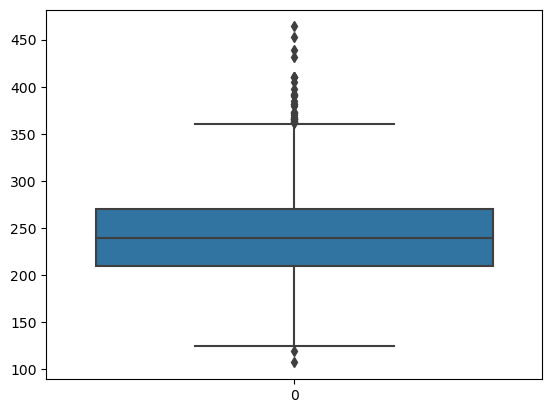

In [39]:
#Remove 2 outliers
heart_data = heart_data.drop(heart_data[heart_data.cholesterol > 599].index)
sns.boxplot(heart_data.cholesterol)

## Data Spliting

In [40]:
X = heart_data.drop('TenYearCHD', axis='columns')
y = heart_data['TenYearCHD']

In [41]:
X

,male,age,currentSmoker,cigsPerDay,bloodPressureMedication,prevalentStroke,prevalentHyp,diabetes,cholesterol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,85.572572


In [42]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [43]:
print(len(X_train))
print(len(X_test))

2965
1271


In [44]:
target_count = heart_data.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1') # Check for Class Imbalance

Class 0: 3272
Class 1: 964
Proportion: 3.39 : 1


### Logistic Regression

In [45]:
model_lr=LogisticRegression()

In [46]:
model_lr.fit(X_train,y_train)

D:\Software setup\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# prediction 
logreg_pred = model_lr.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
lr_acc = accuracy_score(y_test, logreg_pred)
print(f"Accuracy for LogisticRegression: {round(lr_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
lr_f1 = f1_score(y_test, logreg_pred)
print(f"F1 score for LogisticRegression: {round(lr_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
lr_precision = precision_score(y_test, logreg_pred)
print(f"Precision for LogisticRegression: {round(lr_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
lr_recall = recall_score(y_test, logreg_pred)
print(f"Recall for LogisticRegression: {round(lr_recall,3)*100}%")

cm = confusion_matrix(y_test, logreg_pred)
print("Condusion Matrix for LogisticRegression: \n", cm)

Accuracy for LogisticRegression: 83.89999999999999%
F1 score for LogisticRegression: 51.5%
Precision for LogisticRegression: 76.2%
Recall for LogisticRegression: 38.9%
Condusion Matrix for LogisticRegression: 
 [[957  34]
 [171 109]]


### Support vector Machine

In [48]:
#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
svm_acc = accuracy_score(y_test, svm_pred)
print(f"Accuracy for SVM: {round(svm_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
svm_f1 = f1_score(y_test, svm_pred)
print(f"F1 score for SVM: {round(svm_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
svm_precision = precision_score(y_test, svm_pred)
print(f"Precision for SVM: {round(svm_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
svm_recall = recall_score(y_test, svm_pred)
print(f"Recall for SVM: {round(svm_recall,3)*100}%")

cm = confusion_matrix(y_test, svm_pred)
print("Condusion Matrix for SVM: \n", cm)

Accuracy for SVM: 84.5%
F1 score for SVM: 46.9%
Precision for SVM: 95.6%
Recall for SVM: 31.1%
Condusion Matrix for SVM: 
 [[987   4]
 [193  87]]


### Decision Trees

In [49]:
#initialize model
dt = DecisionTreeClassifier()

# fit model
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Accuracy for Decision Trees: {round(dt_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
dt_f1 = f1_score(y_test, dt_pred)
print(f"F1 score for Decision Trees: {round(dt_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
dt_precision = precision_score(y_test, dt_pred)
print(f"Precision for Decision Trees: {round(dt_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
dt_recall = recall_score(y_test, dt_pred)
print(f"Recall for Decision Trees: {round(dt_recall,3)*100}%")

cm = confusion_matrix(y_test, dt_pred)
print("Condusion Matrix for Decision Trees: \n", cm)

Accuracy for Decision Trees: 75.4%
F1 score for Decision Trees: 46.300000000000004%
Precision for Decision Trees: 44.6%
Recall for Decision Trees: 48.199999999999996%
Condusion Matrix for Decision Trees: 
 [[823 168]
 [145 135]]


### Random Forest Classification

In [50]:
rfc =  RandomForestClassifier()

#fit model
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
rfc_acc = accuracy_score(y_test, rfc_pred)
print(f"Accuracy for Random Forest: {round(rfc_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
rfc_f1 = f1_score(y_test, rfc_pred)
print(f"F1 score for Random Forest: {round(rfc_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
rfc_precision = precision_score(y_test, rfc_pred)
print(f"Precision for Random Forest: {round(rfc_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
rfc_recall = recall_score(y_test, rfc_pred)
print(f"Recall for Random Forest: {round(rfc_recall,3)*100}%")

cm = confusion_matrix(y_test, rfc_pred)
print("Condusion Matrix for Random Forest: \n", cm)

Accuracy for Random Forest: 85.6%
F1 score for Random Forest: 55.50000000000001%
Precision for Random Forest: 87.0%
Recall for Random Forest: 40.699999999999996%
Condusion Matrix for Random Forest: 
 [[974  17]
 [166 114]]


### Comparing the Models

In [51]:
scores = {'Model':['Logistic Regression','SVM','Decision Tree','Random Forest'],
        'Accuracy':[lr_acc,svm_acc,dt_acc,rfc_acc],'F1':[lr_f1,svm_f1,dt_f1,rfc_f1],'Recall':[lr_recall,svm_recall,dt_recall,rfc_recall],'Precision':[lr_precision, svm_precision,dt_precision, rfc_precision]}

# Create DataFrame
df = pd.DataFrame(scores)
 
# Print the output.
print(df)

                 Model  Accuracy        F1    Recall  Precision
0  Logistic Regression  0.838710  0.515366  0.389286   0.762238
1                  SVM  0.845004  0.469003  0.310714   0.956044
2        Decision Tree  0.753737  0.463122  0.482143   0.445545
3        Random Forest  0.856019  0.554745  0.407143   0.870229


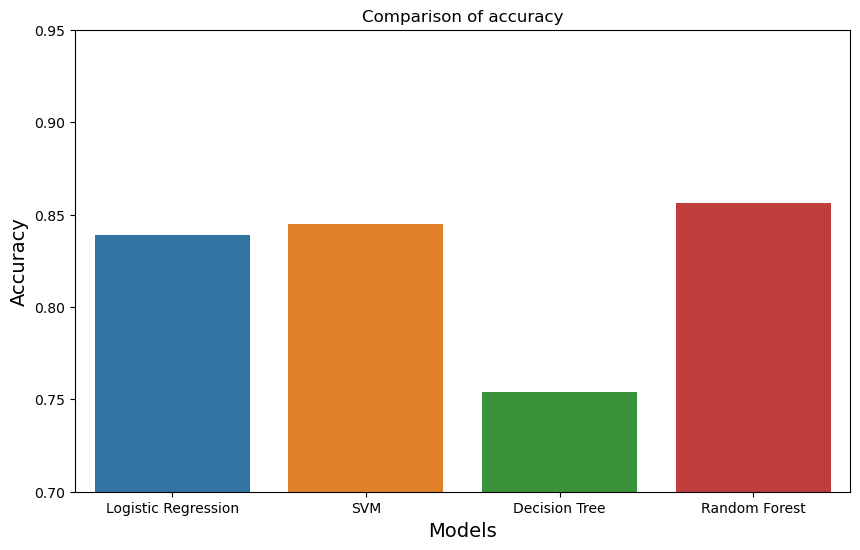

In [52]:


plt.figure(figsize=(10,6))
sns.barplot(x='Model', y='Accuracy', data = df)
plt.title('Comparison of accuracy')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.7, 0.95)
plt.show()


In [53]:
y_train

1448    0
1774    1
3543    0
521     0
2848    0
       ..
2896    0
2764    0
905     0
3982    0
235     0
Name: TenYearCHD, Length: 2965, dtype: int64

In [54]:
filtered_data = y_test[y_test == 1]

# Count the number of occurrences where TenYearCHD is equal to 1
count = len(filtered_data)

# 'filtered_data' now contains rows where TenYearCHD is equal to 1
print("Filtered Data:")
print(filtered_data)

# Print the count
print("Number of occurrences where TenYearCHD is equal to 1:", count)

Filtered Data:
2137    1
1753    1
17      1
1837    1
2794    1
       ..
3446    1
2521    1
1929    1
1032    1
1946    1
Name: TenYearCHD, Length: 280, dtype: int64
Number of occurrences where TenYearCHD is equal to 1: 280


In [55]:
correct_feature_order = ['male', 'age', 'currentSmoker', 'cigsPerDay', 'bloodPressureMedication',
                         'prevalentStroke', 'prevalentHyp', 'diabetes', 'cholesterol',
                         'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# New data point
new_data_point = [1, 66, 1, 66, 1, 1, 1, 1, 1155.0, 86.0,87.0, 84.0, 85.0, 116]

# Create a pandas DataFrame for the new data point
new_data = pd.DataFrame([new_data_point], columns=correct_feature_order)

# Make predictions on the new data
predictions = dt.predict(new_data)

In [56]:
predictions 

array([0], dtype=int64)

In [57]:
import pickle

In [58]:
pickle.dump(model_lr, open('logisticRegression.pkl','wb'))
pickle.dump(svm, open('SVM.pkl','wb'))
# pickle.dump(rfc, open('forest.pkl','wb'))
# pickle.dump(dt, open('tree.pkl','wb'))

In [59]:
import joblib

# # Save the model using joblib
# joblib.dump(rfc, 'rfc.pkl')

In [60]:
joblib.dump(dt, 'tree.pkl')
joblib.dump(rfc, 'forest.pkl')

['forest.pkl']

In [61]:
dt = joblib.load('tree.pkl')

In [62]:
import os
os.getcwd()


'D:\\python\\PROJECT'

In [63]:
try:
    with open('forest.pkl', 'rb') as file:
        rfc1 = pickle.load(file)
    # Check if the model is not None (i.e., loaded successfully)
    if rfc is not None:
        print("Model loaded successfully!")
        # You can now use 'rfc' to make predictions
    else:
        print("Failed to load the model.")
except Exception as e:
    print(f"An error occurred: {e}")

Model loaded successfully!


In [64]:
predictions = dt.predict(new_data)

# The 'predictions' variable now contains the predicted labels for your new data points
print(predictions)

[0]


###  Tune hyperparameters

In [65]:
import warnings
warnings.filterwarnings("ignore")

##### Logistic Regression

In [75]:
#logistic regression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the hyperparameters and their possible distributions to sample from
param_dist = {
    'C': uniform(0.1, 10),  # Regularization parameter (sample from 0.1 to 10)
    'penalty': ['l1', 'l2'],  # Penalty (Lasso or Ridge)
    'solver': ['liblinear', 'saga']  # Algorithm to use in the optimization problem
}
# Create Logistic Regression model
model_lr = LogisticRegression()

# Create Randomized Search Cross-Validation object
random_search = RandomizedSearchCV(estimator=model_lr, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)


# Perform Randomized Search to find the best parameters
random_search.fit(X_train, y_train)

# Get the best parameters found by Randomized Search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)






Best Hyperparameters: {'C': 3.845401188473625, 'penalty': 'l1', 'solver': 'liblinear'}


In [76]:
best_model_lr = LogisticRegression(C=3.845401188473625, penalty='l1', solver='liblinear')
best_model_lr.fit(X_train, y_train)

logreg_pred = best_model_lr.predict(X_test)

lr_acc = accuracy_score(y_test, logreg_pred)
print(f"Accuracy for LogisticRegression: {round(lr_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
lr_f1 = f1_score(y_test, logreg_pred)
print(f"F1 score for LogisticRegression: {round(lr_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
lr_precision = precision_score(y_test, logreg_pred)
print(f"Precision for LogisticRegression: {round(lr_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
lr_recall = recall_score(y_test, logreg_pred)
print(f"Recall for LogisticRegression: {round(lr_recall,3)*100}%")

cm = confusion_matrix(y_test, logreg_pred)
print("Condusion Matrix for LogisticRegression: \n", cm)

Accuracy for LogisticRegression: 85.1%
F1 score for LogisticRegression: 54.300000000000004%
Precision for LogisticRegression: 83.1%
Recall for LogisticRegression: 40.400000000000006%
Condusion Matrix for LogisticRegression: 
 [[968  23]
 [167 113]]


#### SVM

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid you want to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel type
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_


print("Best Hyperparameters:", best_params)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Hyperparameters: {'C': 1, 'kernel': 'poly'}


In [96]:
best_svm_model = SVC(kernel='poly', C=1, random_state=42)

# Fit the model with training data
best_svm_model.fit(X_train, y_train)

# Make predictions using the best model
svm_pred = best_svm_model.predict(X_test)

svm_acc = accuracy_score(y_test, svm_pred)
print(f"Accuracy for SVM: {round(svm_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
svm_f1 = f1_score(y_test, svm_pred)
print(f"F1 score for SVM: {round(svm_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
svm_precision = precision_score(y_test, svm_pred)
print(f"Precision for SVM: {round(svm_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
svm_recall = recall_score(y_test, svm_pred)
print(f"Recall for SVM: {round(svm_recall,3)*100}%")

cm = confusion_matrix(y_test, svm_pred)
print("Condusion Matrix for SVM: \n", cm)

Accuracy for SVM: 84.7%
F1 score for SVM: 47.4%
Precision for SVM: 96.7%
Recall for SVM: 31.4%
Condusion Matrix for SVM: 
 [[988   3]
 [192  88]]


#### Decision Tree

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid you want to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 5, 10, 20]
}
# Create Decision Tree model
dt = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 2}


In [84]:
# Create Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=20
)

# Fit the model with training data
best_dt_model.fit(X_train, y_train)

# Make predictions using the best model
dt_pred = best_dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
print(f"Accuracy for Decision Trees: {round(dt_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
dt_f1 = f1_score(y_test, dt_pred)
print(f"F1 score for Decision Trees: {round(dt_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
dt_precision = precision_score(y_test, dt_pred)
print(f"Precision for Decision Trees: {round(dt_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
dt_recall = recall_score(y_test, dt_pred)
print(f"Recall for Decision Trees: {round(dt_recall,3)*100}%")

cm = confusion_matrix(y_test, dt_pred)
print("Condusion Matrix for Decision Trees: \n", cm)

Accuracy for Decision Trees: 85.39999999999999%
F1 score for Decision Trees: 52.6%
Precision for Decision Trees: 92.0%
Recall for Decision Trees: 36.8%
Condusion Matrix for Decision Trees: 
 [[982   9]
 [177 103]]


#### Random Forest model

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid you want to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_



print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [80]:

# Create Random Forest model with the best hyperparameters
best_rfc_model = RandomForestClassifier(
    n_estimators=200,
    criterion='entropy',
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1
)

# Fit the model with training data
best_rfc_model.fit(X_train, y_train)

# Make predictions using the best model
rfc_pred = best_rfc_model.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
rfc_acc = accuracy_score(y_test, rfc_pred)
print(f"Accuracy for Random Forest: {round(rfc_acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
rfc_f1 = f1_score(y_test, rfc_pred)
print(f"F1 score for Random Forest: {round(rfc_f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
rfc_precision = precision_score(y_test, rfc_pred)
print(f"Precision for Random Forest: {round(rfc_precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall)
rfc_recall = recall_score(y_test, rfc_pred)
print(f"Recall for Random Forest: {round(rfc_recall,3)*100}%")

cm = confusion_matrix(y_test, rfc_pred)
print("Condusion Matrix for Random Forest: \n", cm)

Accuracy for Random Forest: 86.3%
F1 score for Random Forest: 56.699999999999996%
Precision for Random Forest: 93.4%
Recall for Random Forest: 40.699999999999996%
Condusion Matrix for Random Forest: 
 [[983   8]
 [166 114]]


In [99]:
scores_hyp = {'Model':['Logistic Regression','SVM','Decision Tree','Random Forest'],
        'Accuracy':[lr_acc,svm_acc,dt_acc,rfc_acc],'F1':[lr_f1,svm_f1,dt_f1,rfc_f1],'Recall':[lr_recall,svm_recall,dt_recall,rfc_recall],'Precision':[lr_precision, svm_precision,dt_precision, rfc_precision]}

# Create DataFrame
df2 = pd.DataFrame(scores_hyp)
 
# Print the output.
print('Before tuning')
print(df)

print('After tuning')
print(df2)

Before tuning
                 Model  Accuracy        F1    Recall  Precision
0  Logistic Regression  0.838710  0.515366  0.389286   0.762238
1                  SVM  0.845004  0.469003  0.310714   0.956044
2        Decision Tree  0.753737  0.463122  0.482143   0.445545
3        Random Forest  0.856019  0.554745  0.407143   0.870229
After tuning
                 Model  Accuracy        F1    Recall  Precision
0  Logistic Regression  0.845004  0.506266  0.360714   0.848739
1                  SVM  0.846577  0.474394  0.314286   0.967033
2        Decision Tree  0.853659  0.525510  0.367857   0.919643
3        Random Forest  0.863100  0.567164  0.407143   0.934426


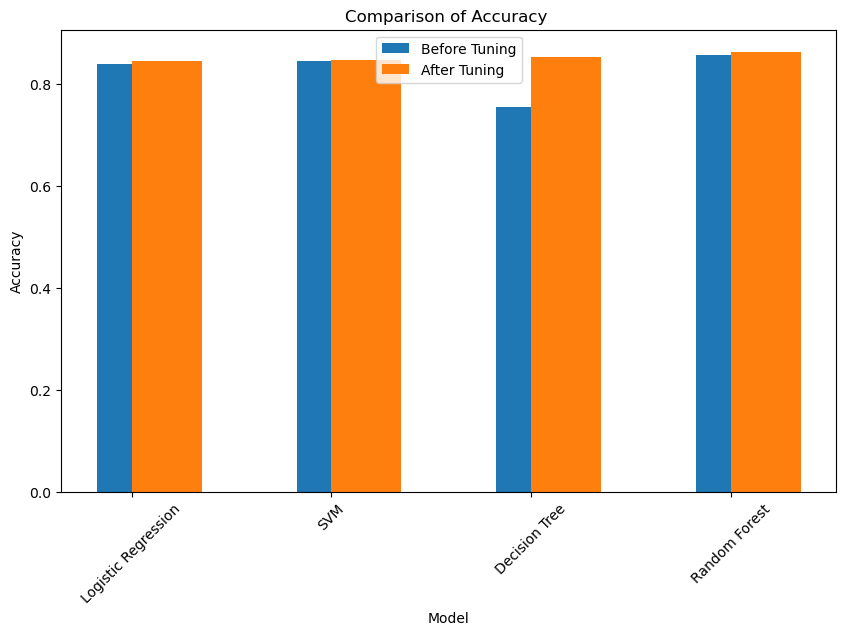

In [100]:
merged_df = pd.merge(df, df2, on='Model', suffixes=('_df1', '_df2'))

# Create a grouped bar chart
plt.figure(figsize=(10, 6))

models = merged_df['Model']
accuracy_df1 = merged_df['Accuracy_df1']
accuracy_df2 = merged_df['Accuracy_df2']

bar_width = 0.35

plt.bar(models, accuracy_df1, width=bar_width, label='Before Tuning')
plt.bar(models, accuracy_df2, width=bar_width, label='After Tuning', align='edge')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy ')
plt.legend()
plt.xticks(rotation=45)
plt.show()

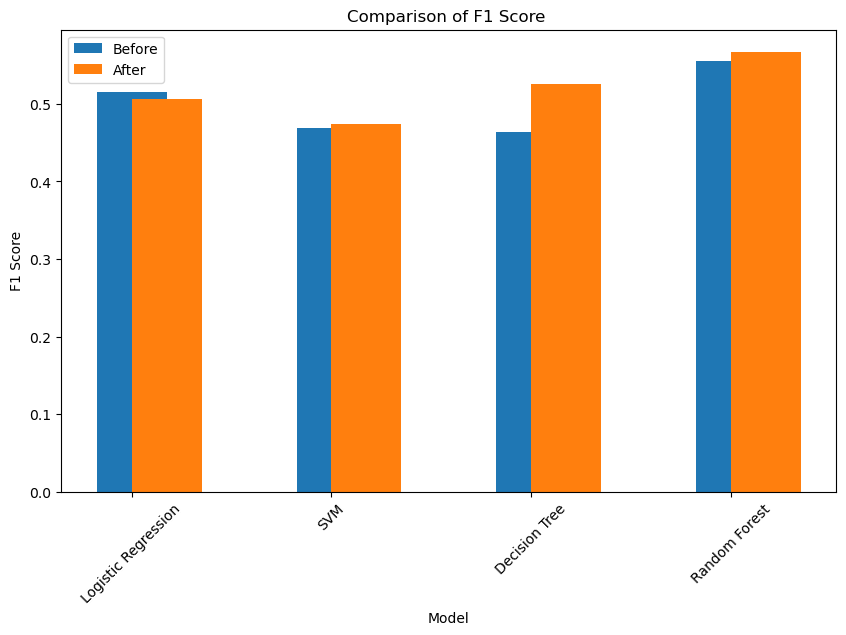

In [101]:
plt.figure(figsize=(10, 6))

f1_df1 = merged_df['F1_df1']
f1_df2 = merged_df['F1_df2']

plt.bar(models, f1_df1, width=bar_width, label='Before')
plt.bar(models, f1_df2, width=bar_width, label='After', align='edge')

plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Score ')
plt.legend()
plt.xticks(rotation=45)
plt.show()

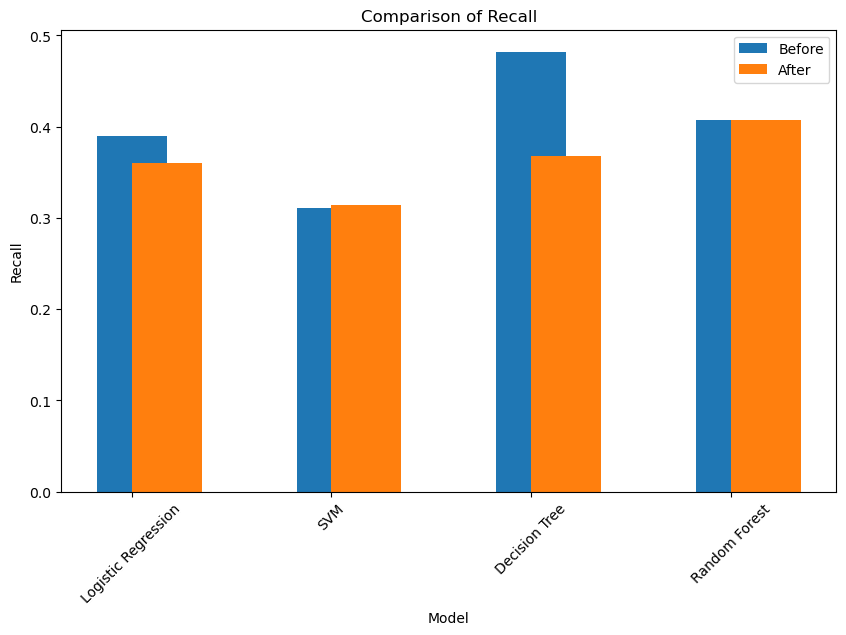

In [102]:
plt.figure(figsize=(10, 6))

recall_df1 = merged_df['Recall_df1']
recall_df2 = merged_df['Recall_df2']

plt.bar(models, recall_df1, width=bar_width, label='Before')
plt.bar(models, recall_df2, width=bar_width, label='After', align='edge')

plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Comparison of Recall')
plt.legend()
plt.xticks(rotation=45)
plt.show()

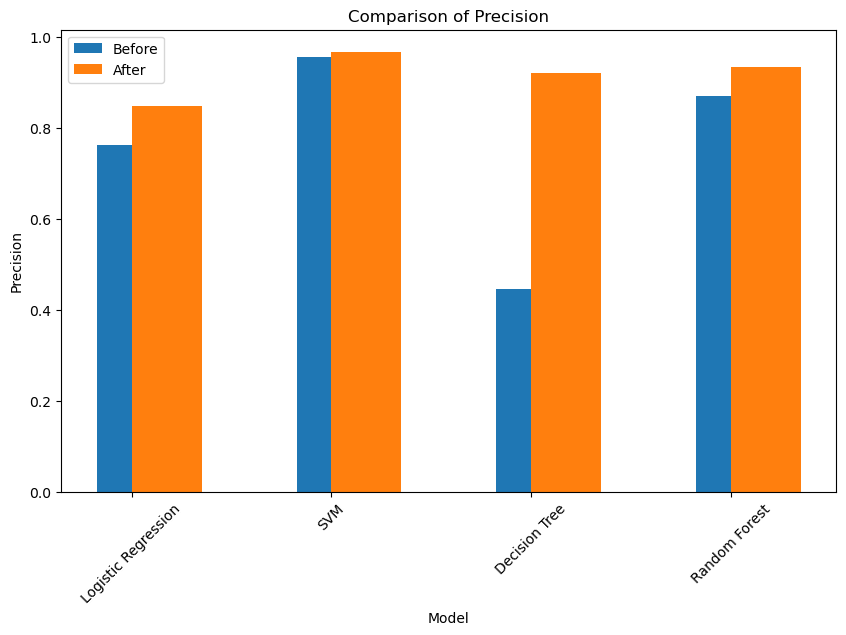

In [103]:
plt.figure(figsize=(10, 6))

precision_df1 = merged_df['Precision_df1']
precision_df2 = merged_df['Precision_df2']

plt.bar(models, precision_df1, width=bar_width, label='Before')
plt.bar(models, precision_df2, width=bar_width, label='After', align='edge')

plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Comparison of Precision')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [104]:
import pickle

In [105]:
pickle.dump(best_model_lr, open('logisticRegression_best.pkl','wb'))
pickle.dump(best_svm_model, open('SVM_best.pkl','wb'))
# pickle.dump(rfc, open('forest.pkl','wb'))
# pickle.dump(dt, open('tree.pkl','wb'))

In [106]:
import joblib

# # Save the model using joblib
# joblib.dump(rfc, 'rfc.pkl')

In [107]:
joblib.dump(best_dt_model, 'tree_best.pkl')
joblib.dump(best_rfc_model, 'forest_best.pkl')

['forest_best.pkl']

In [108]:
dt = joblib.load('tree_best.pkl')

In [109]:
import os
os.getcwd()


'D:\\python\\PROJECT'

In [110]:
try:
    with open('forest_best.pkl', 'rb') as file:
        rfc1 = pickle.load(file)
    # Check if the model is not None (i.e., loaded successfully)
    if rfc is not None:
        print("Model loaded successfully!")
        # You can now use 'rfc' to make predictions
    else:
        print("Failed to load the model.")
except Exception as e:
    print(f"An error occurred: {e}")

Model loaded successfully!


In [112]:
predictions = dt.predict(new_data)

# The 'predictions' variable now contains the predicted labels for your new data points
print(predictions)

[1]
